In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from mplsoccer import Pitch

In [2]:
df = pd.read_csv('/Users/jen-shuo/Desktop/Data portfolio/Football/EPL2021-2022.csv')
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


# Pythagorean Expectation and Winning Rate

In [3]:
# Set result Home win and Away win to 1, Draw to 0.5
df['hwinvalue']=np.where(df['FTR']=='H',1,np.where(df['FTR']=='D',.5,0))
df['awinvalue']=np.where(df['FTR']=='A',1,np.where(df['FTR']=='D',.5,0))
df['count']=1

In [4]:
# Create a df for home team performance
home = df.groupby(['HomeTeam', 'Div'])[['count', 'hwinvalue', 'FTHG', 'FTAG']].sum().reset_index()
home = home.rename(columns={'HomeTeam': 'team', 'count': 'Ph', 'FTHG': 'FTHGh', 'FTAG': 'FTAGh'})
home.head()

,team,Div,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,E0,19,14.0,35,17
1,Aston Villa,E0,19,8.5,29,29
2,Brentford,E0,19,8.5,22,21
3,Brighton,E0,19,8.5,19,23
4,Burnley,E0,19,8.0,18,25


In [5]:
# Create a df for away team performance
away = df.groupby(['AwayTeam'])[['count','awinvalue', 'FTHG','FTAG']].sum().reset_index()
away = away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
away.head()

,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,19,9.5,31,26
1,Aston Villa,19,7.5,25,23
2,Brentford,19,8.0,35,26
3,Brighton,19,11.0,21,23
4,Burnley,19,6.0,28,16


In [6]:
# Merge home and away together
df_merge = pd.merge(home, away, on = ['team'])
df_merge.head()

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,E0,19,14.0,35,17,19,9.5,31,26
1,Aston Villa,E0,19,8.5,29,29,19,7.5,25,23
2,Brentford,E0,19,8.5,22,21,19,8.0,35,26
3,Brighton,E0,19,8.5,19,23,19,11.0,21,23
4,Burnley,E0,19,8.0,18,25,19,6.0,28,16


In [7]:
# Sum the results to get the team overall performance
df_merge['W'] = df_merge['hwinvalue']+df_merge['awinvalue']
df_merge['G'] = df_merge['Ph']+df_merge['Pa']
df_merge['GF'] = df_merge['FTHGh']+df_merge['FTHGa']
df_merge['GA'] = df_merge['FTAGh']+df_merge['FTHGa']
df_merge.head()

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,Arsenal,E0,19,14.0,35,17,19,9.5,31,26,23.5,38,66,48
1,Aston Villa,E0,19,8.5,29,29,19,7.5,25,23,16.0,38,54,54
2,Brentford,E0,19,8.5,22,21,19,8.0,35,26,16.5,38,57,56
3,Brighton,E0,19,8.5,19,23,19,11.0,21,23,19.5,38,40,44
4,Burnley,E0,19,8.0,18,25,19,6.0,28,16,14.0,38,46,53


In [8]:
# Create winning percentage column and Pythagorean Expectation
df_merge['win_p'] = df_merge['W']/df_merge['G']
df_merge['pyth'] = df_merge['GF']**2/(df_merge['GF']**2 + df_merge['GA']**2)
df_merge

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,win_p,pyth
0,Arsenal,E0,19,14.0,35,17,19,9.5,31,26,23.5,38,66,48,0.618421,0.654054
1,Aston Villa,E0,19,8.5,29,29,19,7.5,25,23,16.0,38,54,54,0.421053,0.500000
2,Brentford,E0,19,8.5,22,21,19,8.0,35,26,16.5,38,57,56,0.434211,0.508849
3,Brighton,E0,19,8.5,19,23,19,11.0,21,23,19.5,38,40,44,0.513158,0.452489
4,Burnley,E0,19,8.0,18,25,19,6.0,28,16,14.0,38,46,53,0.368421,0.429645
5,Chelsea,E0,19,12.5,37,22,19,14.0,11,39,26.5,38,48,33,0.697368,0.679045
6,Crystal Palace,E0,19,11.0,27,17,19,7.5,29,23,18.5,38,56,46,0.486842,0.597106
7,Everton,E0,19,10.0,27,25,19,4.0,41,16,14.0,38,68,66,0.368421,0.514922
8,Leeds,E0,19,7.0,19,38,19,7.5,41,23,14.5,38,60,79,0.381579,0.365816
9,Leicester,E0,19,12.0,34,23,19,7.0,36,28,19.0,38,70,59,0.500000,0.584656


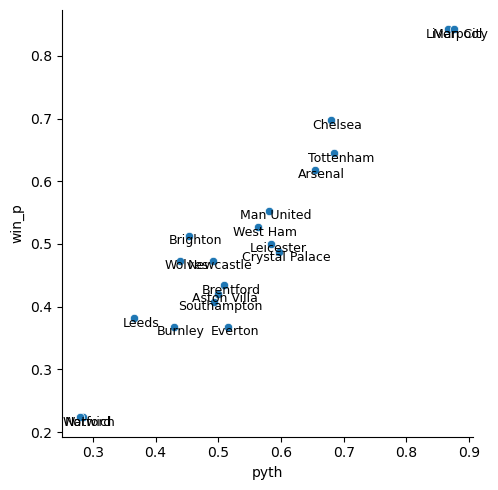

In [95]:
sns.relplot(x='pyth', y='win_p', data=df_merge)

# Add annotations for each point with an offset
for i in range(df_merge.shape[0]):
    plt.annotate(df_merge['team'][i], 
                 (df_merge['pyth'][i], df_merge['win_p'][i]), 
                 textcoords="offset points", 
                 xytext=(5,-6),  # Adjust these values to reduce overlap
                 ha='center', fontsize=9)

# Show the plot
plt.show()

In [213]:
reg1 = sm.ols(formula = 'win_p ~ pyth', data= df_merge)
model = reg1.fit()

In [214]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  win_p   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     185.1
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           6.51e-11
Time:                        14:12:11   Log-Likelihood:                 32.095
No. Observations:                  20   AIC:                            -60.19
Df Residuals:                      18   BIC:                            -58.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0455      0.042     -1.090      0.290      -0.133       0.042
pyth           1.0060      0.074     13.606      0.000       0.851       1.161
==============================================================================
Omnibus:                        0.354   Durbin-Watson:                   2.319
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.074
Skew:                           0.143   Prob(JB):                        0.964
Kurtosis:                       2.914   Cond. No.                         8.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analysis
- Top teams are Liverpool and Man City, but Man City has a bit higher Pythagorean Expectation score
- Chealsea, Tottenham, Arsenal are in the next section
- Regression analysis indicates that the **R-sq = 0.911**, which is a very strong fit using Pythagorean Expectation to predict Winning rate 
- The coefficient of 1.0060 for the pyth variable means that for every one-unit increase in the pyth value, the win_p (winning percentage) is expected to increase by approximately 1.0060 units.
- Linear regression equation:**win_p = -0.0455 + 1.0060 x pyth**


# Man City
- Since I'm a fan of Man City, I'm going to focus on their team performance

In [10]:
# Focus on Man City
mancity = df[(df['HomeTeam'] == 'Man City') | (df['AwayTeam'] == 'Man City')]
mancity.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,hwinvalue,awinvalue,count
9,E0,15/08/2021,16:30,Tottenham,Man City,1,0,H,0,0,...,2.09,1.87,2.06,1.94,2.15,1.84,2.05,1.0,0.0,1
14,E0,21/08/2021,15:00,Man City,Norwich,5,0,H,2,0,...,1.80,2.07,1.85,2.11,1.97,2.04,1.84,1.0,0.0,1
20,E0,28/08/2021,12:30,Man City,Arsenal,5,0,H,3,0,...,1.77,2.14,1.79,2.15,2.05,2.05,1.83,1.0,0.0,1
33,E0,11/09/2021,15:00,Leicester,Man City,0,1,A,0,0,...,2.05,1.81,2.12,1.90,2.22,1.79,2.10,0.0,1.0,1
44,E0,18/09/2021,15:00,Man City,Southampton,0,0,D,0,0,...,2.06,1.87,2.04,1.91,2.18,1.84,2.05,0.5,0.5,1


In [11]:
# Separate the Man City Home and Away games
mancity_home = mancity[mancity['HomeTeam']=='Man City']
mancity_away = mancity[mancity['AwayTeam']=='Man City']

In [12]:
# Full time goal in home and away games 
print('Home', mancity_home['FTHG'].describe())
print()
print('Away', mancity_away['FTAG'].describe())
print()
print('FTG Mean', (mancity_home['FTHG'].mean()+mancity_away['FTAG'].mean())/2)

Home count    19.000000
mean      3.052632
std       2.013115
min       0.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       7.000000
Name: FTHG, dtype: float64

Away count    19.000000
mean      2.157895
std       1.462994
min       0.000000
25%       1.000000
50%       2.000000
75%       3.500000
max       5.000000
Name: FTAG, dtype: float64

FTG Mean 2.605263157894737


In [13]:
# Shots
print('Home', mancity_home['HS'].describe())
print()
print('Away', mancity_away['AS'].describe())
print()
print('Shots Mean', (mancity_home['HS'].mean()+mancity_away['AS'].mean())/2)

Home count    19.000000
mean     19.000000
std       5.131601
min      11.000000
25%      15.500000
50%      18.000000
75%      22.500000
max      31.000000
Name: HS, dtype: float64

Away count    19.000000
mean     18.631579
std       4.968909
min      12.000000
25%      15.500000
50%      18.000000
75%      21.000000
max      31.000000
Name: AS, dtype: float64

Shots Mean 18.815789473684212


In [14]:
# Shots on Target
print('Home', mancity_home['HST'].describe())
print()
print('Away', mancity_away['AST'].describe())
print()
print('Shots on Target Mean', (mancity_home['HST'].mean()+mancity_away['AST'].mean())/2)

Home count    19.000000
mean      7.000000
std       3.231787
min       1.000000
25%       5.000000
50%       7.000000
75%       9.000000
max      15.000000
Name: HST, dtype: float64

Away count    19.000000
mean      6.368421
std       3.183473
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      14.000000
Name: AST, dtype: float64

Shots on Target Mean 6.684210526315789


In [15]:
print('Shots & Score ratio', 2.61/18.82)
print('Shots & Shots on Target ratio', 6.68/18.12)
print('Shots on Target & Score ratio', 2.61/6.68)

Shots & Score ratio 0.13868225292242295
Shots & Shots on Target ratio 0.368653421633554
Shots on Target & Score ratio 0.3907185628742515


Home Goals Scored: 58, Home Goals Conceded: 15
Away Goals Scored: 41, Away Goals Conceded: 11


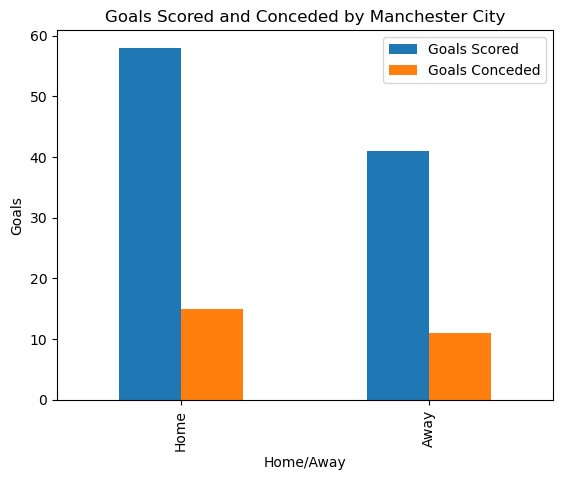

In [16]:
# Goals scored and conceded in home matches
home_goals_scored = mancity[mancity['HomeTeam'] == 'Man City']['FTHG'].sum()
home_goals_conceded = mancity[mancity['HomeTeam'] == 'Man City']['FTAG'].sum()

# Goals scored and conceded in away matches
away_goals_scored = mancity[mancity['AwayTeam'] == 'Man City']['FTAG'].sum()
away_goals_conceded = mancity[mancity['AwayTeam'] == 'Man City']['FTHG'].sum()

print(f"Home Goals Scored: {home_goals_scored}, Home Goals Conceded: {home_goals_conceded}")
print(f"Away Goals Scored: {away_goals_scored}, Away Goals Conceded: {away_goals_conceded}")

# Visualize
data = {
    'Goals Scored': [home_goals_scored, away_goals_scored],
    'Goals Conceded': [home_goals_conceded, away_goals_conceded]
}

index = ['Home', 'Away']
df_goals = pd.DataFrame(data, index=index)

df_goals.plot(kind='bar')
plt.title('Goals Scored and Conceded by Manchester City')
plt.ylabel('Goals')
plt.xlabel('Home/Away')
plt.show()


In [17]:
# Foul committed in Home and Away games
print('Home', mancity_home['HF'].describe())
print()
print('Away', mancity_away['AF'].describe())

Home count    19.000000
mean      8.368421
std       2.947891
min       5.000000
25%       5.000000
50%       9.000000
75%      11.000000
max      13.000000
Name: HF, dtype: float64

Away count    19.000000
mean      8.473684
std       3.115703
min       3.000000
25%       6.000000
50%       8.000000
75%      11.000000
max      14.000000
Name: AF, dtype: float64


# Man City vs Aston Villa (May/22/2022)
- Now we pick a game to look deeper

In [38]:
import requests
from bs4 import BeautifulSoup
import json

In [40]:
# Scrape a single game shots. We will allow users to enter a base url
# 16754
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match

Please enter the match id: 16754


In [41]:
# Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

### Shots

In [74]:
# Get only the shotsData
strings = scripts[1].string
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22477932\\x22,\\x22minute\\x22\\x3A\\x222\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.955999984741211\\x22,\\x22Y\\x22\\x3A\\x220.605999984741211\\x22,\\x22xG\\x22\\x3A\\x220.06356179714202881\\x22,\\x22player\\x22\\x3A\\x22Fernandinho\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x22614\\x22,\\x22situation\\x22\\x3A\\x22SetPiece\\x22,\\x22season\\x22\\x3A\\x222021\\x22,\\x22shotType\\x22\\x3A\\x22Head\\x22,\\x22match_id\\x22\\x3A\\x2216754\\x22,\\x22h_team\\x22\\x3A\\x22Manchester\\x20City\\x22,\\x22a_team\\x22\\x3A\\x22Aston\\x20Villa\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222022\\x2D05\\x2D22\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Kevin\\x20De\\x20Bruyne\\x22,\\x22lastAction\\x22\\x3A\\x22Cross\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22477933\\x22,\\x22minute\\x22\\x3A\\x224\\x22,\\x22

In [80]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
shots = json.loads(json_data)
shots

{'h': [{'id': '477932',
   'minute': '2',
   'result': 'MissedShots',
   'X': '0.955999984741211',
   'Y': '0.605999984741211',
   'xG': '0.06356179714202881',
   'player': 'Fernandinho',
   'h_a': 'h',
   'player_id': '614',
   'situation': 'SetPiece',
   'season': '2021',
   'shotType': 'Head',
   'match_id': '16754',
   'h_team': 'Manchester City',
   'a_team': 'Aston Villa',
   'h_goals': '3',
   'a_goals': '2',
   'date': '2022-05-22 15:00:00',
   'player_assisted': 'Kevin De Bruyne',
   'lastAction': 'Cross'},
  {'id': '477933',
   'minute': '4',
   'result': 'BlockedShot',
   'X': '0.855',
   'Y': '0.649000015258789',
   'xG': '0.06113560125231743',
   'player': 'João Cancelo',
   'h_a': 'h',
   'player_id': '2379',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'RightFoot',
   'match_id': '16754',
   'h_team': 'Manchester City',
   'a_team': 'Aston Villa',
   'h_goals': '3',
   'a_goals': '2',
   'date': '2022-05-22 15:00:00',
   'player_assisted': 'Phil Foden'

In [97]:
x = []
y = []
xG = []
result = []
player = []
team = []
data_away = shots['a']
data_home = shots['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])

In [98]:
col_names = ['x','y','xG','result','player','team']
df_shots = pd.DataFrame([x,y,xG,result,player,team],index=col_names)
df_shots = df_shots.T
df_shots

,x,y,xG,result,player,team
0,0.955999984741211,0.605999984741211,0.06356179714202881,MissedShots,Fernandinho,Manchester City
1,0.855,0.649000015258789,0.06113560125231743,BlockedShot,João Cancelo,Manchester City
2,0.8569999694824219,0.43099998474121093,0.0956450030207634,BlockedShot,Phil Foden,Manchester City
3,0.8919999694824219,0.74,0.03272930160164833,BlockedShot,João Cancelo,Manchester City
4,0.845999984741211,0.6140000152587891,0.06224840134382248,MissedShots,Gabriel Jesus,Manchester City
5,0.9680000305175781,0.34700000762939454,0.05484690144658089,BlockedShot,Kevin De Bruyne,Manchester City
6,0.75,0.7069999694824218,0.01756650023162365,BlockedShot,João Cancelo,Manchester City
7,0.7859999847412109,0.610999984741211,0.025742100551724434,BlockedShot,João Cancelo,Manchester City
8,0.9180000305175782,0.5640000152587891,0.06785249710083008,SavedShot,Aymeric Laporte,Manchester City
9,0.8980000305175782,0.425,0.05072680115699768,MissedShots,Kevin De Bruyne,Manchester City


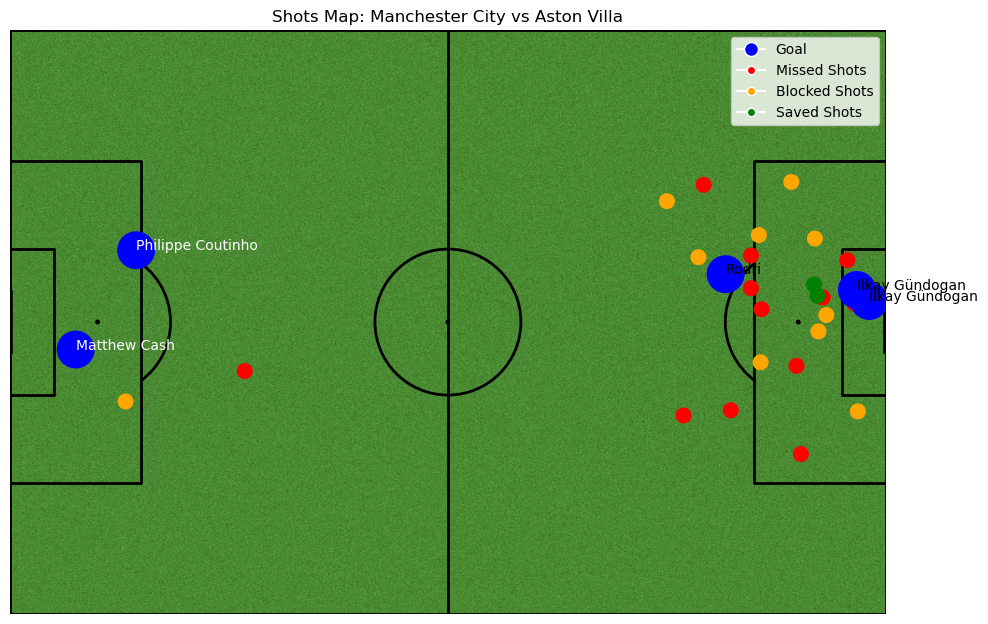

In [99]:
# Plot the shot map

# Ensure the result column is treated as a categorical variable
df_shots['result'] = df_shots['result'].astype('category')

# Draw a pitch
pitch = Pitch(line_color='black', pitch_color='grass', pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(10, 7))

# Define color mapping for different shot results
color_mapping = {
    'Goal': 'blue',
    'MissedShots': 'red',
    'BlockedShot': 'orange',
    'SavedShot': 'green'
}

# Scale x and y coordinates to fit the pitch dimensions (120x80)
df_shots['x'] = df_shots['x'].astype(float) * 120
df_shots['y'] = df_shots['y'].astype(float) * 80

# Mirror Aston Villa's shots to the opposite side of the pitch
df_shots.loc[df_shots['team'] == 'Aston Villa', 'x'] = 120 - df_shots.loc[df_shots['team'] == 'Aston Villa', 'x']

# Plot shots for both teams
for team in ['Manchester City', 'Aston Villa']:
    team_shots = df_shots[df_shots['team'] == team]
    for i, shot in team_shots.iterrows():
        x = shot['x']
        y = shot['y']
        result = shot['result']
        color = color_mapping[result]
        if result == 'Goal':
            shot_circle = plt.Circle((x, y), 2.5, color=color, edgecolor='black' if team == 'Aston Villa' else 'none')  # Larger size for goals
            plt.text(x, y, shot['player'], fontsize=10, color='white' if team == 'Aston Villa' else 'black')
        else:
            shot_circle = plt.Circle((x, y), 1, color=color, edgecolor='black' if team == 'Aston Villa' else 'none')
        ax.add_patch(shot_circle)

# Set the limits for the x and y axes
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)

# Create legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Goal', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Missed Shots', markerfacecolor='red', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Blocked Shots', markerfacecolor='orange', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Saved Shots', markerfacecolor='green', markersize=6)
]

ax.legend(handles=legend_elements, loc='upper right')

plt.title('Shots Map: Manchester City vs Aston Villa')
plt.show()


## xG (Expected Goal)
- A way to measure the quality of the shot
- By using angle of the shot, type of assist, the probability of goal
- 0-1, 0.5 means 50% chance to make it a goal
- The higher the xG, the more likely it will be scored

In [169]:
import matplotlib as mpl

In [170]:
# Add shot minute column to the data frame
x = []
y = []
xG = []
result = []
player = []
team = []
minute = []
data_away = shots['a']
data_home = shots['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])

col_names = ['minute','x','y','xG','result','player','team']
df_shots = pd.DataFrame([minute,x,y,xG,result,player,team],index=col_names)
df_shots = df_shots.T
df_shots

,minute,x,y,xG,result,player,team
0,2,0.955999984741211,0.605999984741211,0.06356179714202881,MissedShots,Fernandinho,Manchester City
1,4,0.855,0.649000015258789,0.06113560125231743,BlockedShot,João Cancelo,Manchester City
2,23,0.8569999694824219,0.43099998474121093,0.0956450030207634,BlockedShot,Phil Foden,Manchester City
3,27,0.8919999694824219,0.74,0.03272930160164833,BlockedShot,João Cancelo,Manchester City
4,30,0.845999984741211,0.6140000152587891,0.06224840134382248,MissedShots,Gabriel Jesus,Manchester City
5,43,0.9680000305175781,0.34700000762939454,0.05484690144658089,BlockedShot,Kevin De Bruyne,Manchester City
6,44,0.75,0.7069999694824218,0.01756650023162365,BlockedShot,João Cancelo,Manchester City
7,46,0.7859999847412109,0.610999984741211,0.025742100551724434,BlockedShot,João Cancelo,Manchester City
8,47,0.9180000305175782,0.5640000152587891,0.06785249710083008,SavedShot,Aymeric Laporte,Manchester City
9,47,0.8980000305175782,0.425,0.05072680115699768,MissedShots,Kevin De Bruyne,Manchester City


In [171]:
a_xg = [0]
h_xg = [0]
a_min = [0]
h_min = [0]

# find home and away team

hteam= df_shots['team'].iloc[0]
ateam = df_shots['team'].iloc[-1]

for x in range(len(df_shots['xG'])):
    if df_shots['team'][x]==ateam:
        a_xg.append(df_shots['xG'][x])
        a_min.append(df_shots['minute'][x])
    if df_shots['team'][x]==hteam:
        h_xg.append(df_shots['xG'][x])
        h_min.append(df_shots['minute'][x])

In [172]:
# This is each shot
print(a_xg)
print(h_xg)

[0, '0.06013130024075508', '0.08686979860067368', '0.02091990038752556', '0.07991970330476761']
[0, '0.06356179714202881', '0.06113560125231743', '0.0956450030207634', '0.03272930160164833', '0.06224840134382248', '0.05484690144658089', '0.01756650023162365', '0.025742100551724434', '0.06785249710083008', '0.05072680115699768', '0.13576699793338776', '0.586322009563446', '0.020437700673937798', '0.05040640011429787', '0.055538300424814224', '0.05326959863305092', '0.09440559893846512', '0.13904300332069397', '0.06157840043306351', '0.5095549821853638', '0.08914720267057419', '0.04535669833421707', '0.042314499616622925', '0.04056769981980324', '0.9017159938812256']


In [173]:
# Make each shot cumulative
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

# Make sure the value in a_xg and h_xg are float
def to_float(nums_list):
    result = []
    for num in nums_list:
        try:
            result.append(float(num))
        except ValueError:
            continue
    return result

a_xg = to_float(a_xg)
h_xg = to_float(h_xg)

a_cumulative = nums_cumulative_sum(a_xg)
h_cumulative = nums_cumulative_sum(h_xg)

In [174]:
# Now it's the cumulative xG for away team
print(a_cumulative)
print(h_cumulative)

[0.0, 0.06013130024075508, 0.14700109884142876, 0.16792099922895432, 0.24784070253372192]
[0.0, 0.06356179714202881, 0.12469739839434624, 0.22034240141510963, 0.25307170301675797, 0.31532010436058044, 0.37016700580716133, 0.387733506038785, 0.4134756065905094, 0.4813281036913395, 0.5320549048483372, 0.6678219027817249, 1.254143912345171, 1.2745816130191088, 1.3249880131334066, 1.3805263135582209, 1.4337959121912718, 1.528201511129737, 1.6672445144504309, 1.7288229148834944, 2.238377897068858, 2.3275250997394323, 2.3728817980736494, 2.4151962976902723, 2.4557639975100756, 3.357479991391301]


In [175]:
a_total = round(a_cumulative[-1],2)
h_total = round(h_cumulative[-1],2)

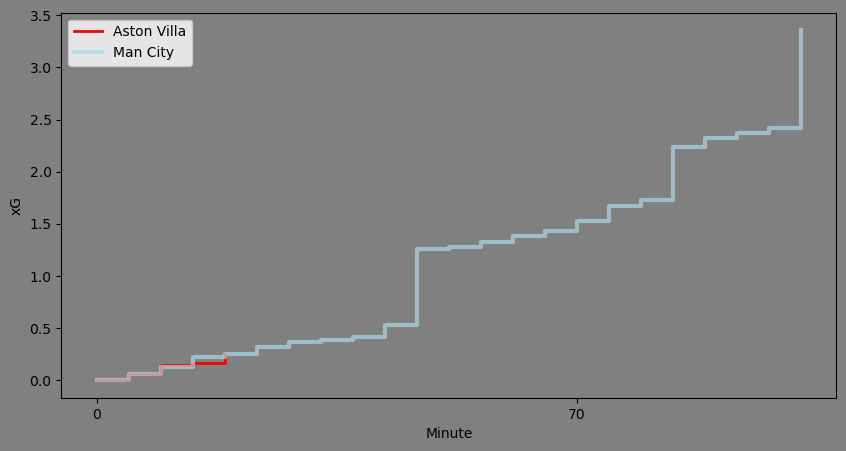

In [197]:
# Plot the Cumulative xGs
fig, ax = plt.subplots(figsize=(10, 5))
fig.set_facecolor('gray')
ax.patch.set_facecolor('gray')

# Set x-ticks and labels
plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.xlabel('Minute')
plt.ylabel('xG')

# Plot the cumulative xG with transparency
ax.step(x=a_min, y=a_cumulative, where='post', color='red', alpha=1, linewidth=2, label='Aston Villa')
ax.step(x=h_min, y=h_cumulative, where='post', color='lightblue', alpha=0.7, linewidth=3, label='Man City')

# Add legend
plt.legend()

# Show plot
plt.show()
